In [151]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs 

In [152]:
from config_matplotlib import configurer_style_matplotlib
configurer_style_matplotlib()

Dimension de X : (100, 2)
Dimension de y : (100, 1)


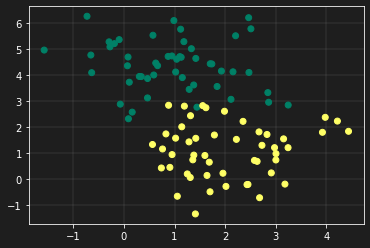

In [153]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("Dimension de X :", X.shape)
print("Dimension de y :", y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [154]:
from sklearn.model_selection import train_test_split

# Diviser les données en train set et test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [156]:
def model(X, W, b):
    Z = X.dot(W) + b 
    A = 1 / (1 + np.exp(-Z))
    return A

In [157]:
def log_loss(A, y):
    epsilon = 1e-15
    m = len(y) 
    ll = (1/m) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))
    return ll

In [158]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [159]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [160]:
def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

In [162]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.1, n_iter=100):
    from sklearn.metrics import accuracy_score
    from tqdm import tqdm 
    
    # Initialisation W, b 
    W, b = initialisation(X_train)
    
    train_loss = [] 
    train_acc = []
    
    test_loss = []
    test_acc = [] 
    
    # Training 
    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b) # Fonction d'activation 
        
        if i %10 == 0:
            
            # Train set 
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
            
            # Test set 
            A_test = model(X_test, W, b) # Fonction d'activation
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))
        
        # Mise à jour 
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="train loss")
    plt.plot(test_loss, label="test loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="train accuracy")
    plt.plot(test_acc, label="test accuracy")
    plt.legend()
    
    plt.show()
    
    return (W, b)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1577.94it/s]


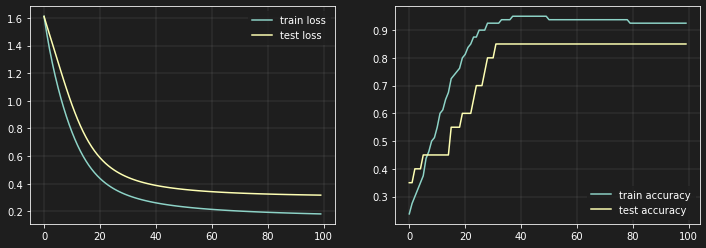

In [163]:
W, b = artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iter=1000)

### Frontière de décision : 
$$z(x_1, x_2) = 0 \implies w_1x_1 + w_2x_2 + b = 0  \implies x_2 = \frac{-w_1x_1 - b}{w_2}$$

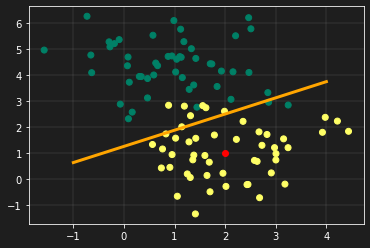

In [164]:
# Prédiction d'un point quelconque 
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 10)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='red')
plt.plot(x0, x1, lw=3, c='orange')
plt.show()

In [165]:
print("Probabilité =", predict(new_plant, W, b))

Probabilité = [ True]


In [166]:
import plotly.graph_objects as go

X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

### Dogs and Cats Dataset 

In [167]:
from utilities import *

In [168]:
X_train, y_train, X_test, y_test = load_data()

In [169]:
print("dimension de X_train :", X_train.shape)
print("dimension de X_test :", X_test.shape)
print("dimension de y_train :", y_train.shape)
print("dimension de y_test :", y_test.shape)

dimension de X_train : (1000, 64, 64)
dimension de X_test : (200, 64, 64)
dimension de y_train : (1000, 1)
dimension de y_test : (200, 1)


In [170]:
print(np.unique(y_test, return_counts=True))

(array([0., 1.]), array([100, 100]))


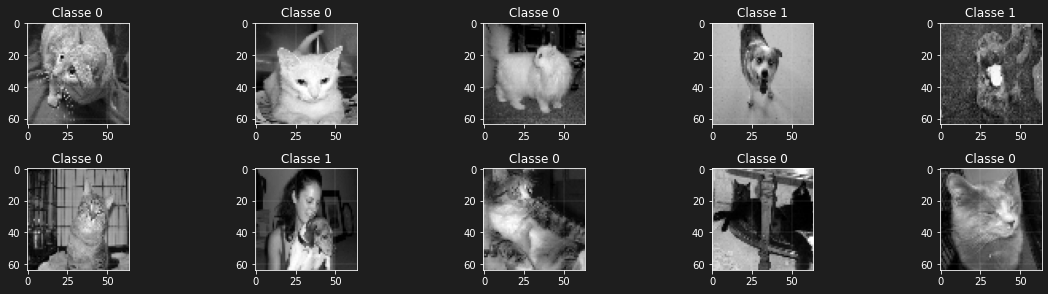

In [171]:
# (classe 0 : chat) & (classe 1 : chien)

plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Classe {int(y_train[i])}")
    plt.tight_layout()
plt.show()

In [144]:
# To do 
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modèle sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# 4. Evaluer le modele sur le test-set (tracer egalement la courbe de Loss pour le test_set)
# 5. Conclusion 

In [172]:
# étape 2.
X_train_reshape = X_train.reshape((X_train.shape[0], -1)) / X_train.max()
X_test_reshape = X_test.reshape((X_test.shape[0], -1)) / X_train.max()

100%|██████████| 10000/10000 [00:26<00:00, 375.13it/s]


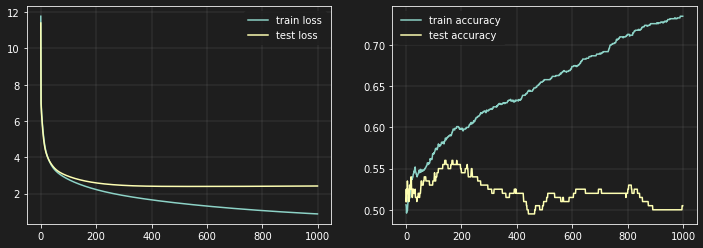

In [173]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=10000)

> Conclusion :
- Problème de sur-ajustement 
- Ne généralise pas bien sur les données du test set 
- Trop peu de données (1000 photos, pas assez pour un modèle de Deep Learning)
- Trop de variables (4096) pour seulement 1000 photos de chats et chiens => fléau de la dimension 

> Amélioration :
- Augmentation du volume de données 
- Régularisation (pénalité L1 ou L2)
- Réduire le nombre de variables 

> Remarque :
- Ces améliorations ne suffiront pas à donner de meilleurs prédictions car le modèle est beaucoup trop simpliste car seulement un neurone pour ce modèle => modèle linéaire (insuffisant pour ce genre de prédictions)